# Analysing Trademe Data

Now that I've scraped all of the trademe data, I can now analyse it to decide where I want to move.

In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()

In [2]:
dirlist = os.listdir(os.getcwd())
dirlist

['.ipynb_checkpoints',
 '13282122_10207629174504871_1516068341_n.jpg',
 'all_rentals_29-01-2017.pkl',
 'Analysing Trademe Data.ipynb',
 'dist.png',
 'Email Template.txt',
 'output.txt',
 'Rental Details.ods',
 'rentals.pkl',
 'rentals_01-02-2017.pkl',
 'rentals_02-02-2017.pkl',
 'rentals_06-02-2017.pkl',
 'rentals_08-02-2017.pkl',
 'rentals_14-01-2017.pkl',
 'rentals_16-01-2017.pkl',
 'rentals_24-01-2017.pkl',
 'rentals_26-01-2017.pkl',
 'rentals_27-01-2017.pkl',
 'rentals_28-01-2017.pkl',
 'rentals_29-01-2017.pkl',
 'rentals_30-01-2017.pkl',
 'rentals_31-01-2017.pkl',
 'results_dict.pkl',
 'trademe_scraper.py',
 'Web Scraping Trade Me.ipynb',
 'wellington_rentals.csv']

In [3]:
rental_files = [f for f in dirlist if re.search("rentals_\d{2}-\d{2}-\d{4}.pkl", f) != None]
print(rental_files)

['all_rentals_29-01-2017.pkl', 'rentals_01-02-2017.pkl', 'rentals_02-02-2017.pkl', 'rentals_06-02-2017.pkl', 'rentals_08-02-2017.pkl', 'rentals_14-01-2017.pkl', 'rentals_16-01-2017.pkl', 'rentals_24-01-2017.pkl', 'rentals_26-01-2017.pkl', 'rentals_27-01-2017.pkl', 'rentals_28-01-2017.pkl', 'rentals_29-01-2017.pkl', 'rentals_30-01-2017.pkl', 'rentals_31-01-2017.pkl']


In [4]:
rental_dicts = {}
import pickle
for filename in rental_files:
    with open(filename, 'r') as f:
        rental_dicts[filename] = pickle.load(f)
        f.close()

In [5]:
sorted(rental_dicts.keys())

['all_rentals_29-01-2017.pkl',
 'rentals_01-02-2017.pkl',
 'rentals_02-02-2017.pkl',
 'rentals_06-02-2017.pkl',
 'rentals_08-02-2017.pkl',
 'rentals_14-01-2017.pkl',
 'rentals_16-01-2017.pkl',
 'rentals_24-01-2017.pkl',
 'rentals_26-01-2017.pkl',
 'rentals_27-01-2017.pkl',
 'rentals_28-01-2017.pkl',
 'rentals_29-01-2017.pkl',
 'rentals_30-01-2017.pkl',
 'rentals_31-01-2017.pkl']

In [6]:
before_rentals = rental_dicts['rentals_06-02-2017.pkl']
after_rentals  = rental_dicts['rentals_08-02-2017.pkl']

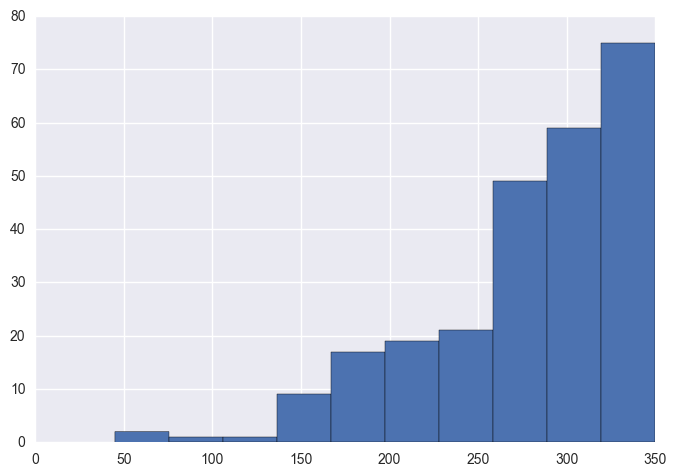

In [7]:
rentals = after_rentals
def get_price(price):
    price = ''.join(re.findall("\d+", price))
    return int(price)

price_list = [get_price(rental['price']) for rental in rentals]
price_list = [price for price in price_list if price < 1000]
plt.hist(price_list, bins=10)
print

In [8]:
before_links = [rental['link'] for rental in before_rentals if get_price(rental['price']) < 300]
rentals = [rental for rental in rentals if rental['link'] not in before_links]

In [9]:
pd.DataFrame.from_dict(rentals).to_csv("wellington_rentals.csv", encoding='utf-8')

In [10]:
rental_df = pd.DataFrame.from_dict(rentals)
table_df = pd.DataFrame.from_dict([rental['table'] for rental in rentals])
rental_df = pd.concat([rental_df, table_df], axis=1)
del rental_df['table']
rental_df.head()

,available_date,bathrooms,bedrooms,contact,description,link,listdate,location,page_views,price,title,Available:,Furnishings:,Ideal tenants:,In the area:,Location:,Parking:,Property ID#:,Smoke alarm:
0,Available Fri 3 Mar,1,2,,2 bedroom unit with 1 bathroom.2 dbl brms with...,http://www.trademe.co.nz/property/residential-...,Listed Today,"Manor Park, Lower Hutt",0015,$310 per week,20B McDougall Grove,Fri 3 Mar,NaN,Mature single or couple who love gardening.,Limited with Silverstre­am being the closest.,20B McDougall Grove\nManor Park\nLower Hutt\nW...,Off street parking and garage available to sui...,FDT592,Yes
1,Available Sat 18 Feb,1,1,Mike Seagar,"1 bedroom apartment with 1 bathroom.A modern, ...",http://www.trademe.co.nz/property/residential-...,Listed Today,"Te Aro, Wellington",0170,$315 per week,402/15 Holland Street,Sat 18 Feb,"Fully furnished, fridge with freezer compartme...",Reliable tenant(s) with proven renting record ...,"Courtenay hospitalit­y precinct, CBD, retail, ...",402/15 Holland Street\nTe Aro\nWellington\nWel...,Not applicable,FDT099,Yes
2,Available Sat 25 Feb,1,1,Quinovic Vivian St,1 bedroom apartment with 1 bathroom.This studi...,http://www.trademe.co.nz/property/residential-...,Listed Yesterday,"Wellington Central, Wellington",0645,$295 per week,308/169 The Terrace,Sat 25 Feb,"Oven, range hood, bar fridge, electric hob x 2...",NaN,NaN,308/169 The Terrace\nWellington Central\nWelli...,Not Specified,NaN,NaN
3,Available Tue 21 Feb,1,1,,1 bedroom apartment with 1 bathroom.Compact 1 ...,http://www.trademe.co.nz/property/residential-...,Listed Yesterday,"Lyall Bay, Wellington",0897,$285 per week,7/84 Freyberg Street,Tue 21 Feb,"Fridge/Fre­ezer, Oven (with range hood), Washi...",Best suit single mature profession­al lady who...,"3 min walk to Beach or bus near airport,ca­f...",7/84 Freyberg Street\nLyall Bay\nWellington\nW...,Free off street parking,FDQ498,Yes
4,Available Thu 16 Feb,1,1,Sheila Molnar,1 bedroom apartment with 1 bathroom.Courtyard ...,http://www.trademe.co.nz/property/residential-...,"Listed Thu, 2 Feb","Wellington Central, Wellington",1324,$340 per week,N405A/28 Torrens Tce,Thu 16 Feb,"Fridge, was­her/drier, dishdraw, leather couch...",Caring profession­al.,"Cafes, restaurant­s, shops, theatres and all t...",N405A/28 Torrens Tce\nWellington Central\nWell...,Secure parking available for additional cost.,FDM614,NaN


In [11]:
col_labels = ['title', 'price', 'available_date', 'listdate',
              'link', 'location', 'Location:', 'contact',
              'description', 'page_views', 'Available:',
              'Furnishings:', 'Ideal tenants:', 'In the area:',
              'Parking:', 'Property ID#:', 'Smoke alarm:',
              'bathrooms', 'bedrooms']
rental_df = rental_df[col_labels]

In [12]:
list(rental_df.columns)

['title',
 'price',
 'available_date',
 'listdate',
 'link',
 'location',
 'Location:',
 'contact',
 'description',
 'page_views',
 'Available:',
 'Furnishings:',
 'Ideal tenants:',
 'In the area:',
 'Parking:',
 'Property ID#:',
 'Smoke alarm:',
 'bathrooms',
 'bedrooms']

In [13]:
rental_df['price'] = rental_df['price'].apply(get_price) 

In [14]:
get_ints = lambda s: ''.join(re.findall("\d+", s))
rental_df['page_views'] = rental_df['page_views'].apply(get_ints)
rental_df['bathrooms']  = rental_df['bathrooms'].apply(get_ints)
rental_df['bedrooms']   = rental_df['bedrooms'].apply(get_ints)

In [15]:
rental_df.to_csv("wellington_rentals.csv", encoding='utf-8')

# Looking up rentals list

Now I am going to look through the cheaper places to get a sense for what is available.

In [16]:
cheap_rentals = [rental for rental in rentals if get_price(rental['price']) < 250]
print("There are %d new cheap rental properties in Wellington\n" %len(cheap_rentals))
for rental in cheap_rentals:
    print("%s:" %rental['title'])
    print(rental['link'])

There are 14 new cheap rental properties in Wellington

3/48D Merton Street:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1258317281.htm
4/9 Totara Street:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1258273196.htm
Oriel Place:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257855322.htm
329B Paekakariki hill road:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257702827.htm
11/120 Randwick Road:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257531975.htm
Left garage/58 Fairlie Street:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257459766.htm
CP 3/244  The Terrace:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257458530.htm
1/6 Rimu Road:
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257454046.htm
22 Hawker Street:
http://www.trademe.co.nz/property/residential-property-to-rent/auc

In [17]:
price_data = pd.DataFrame([(rental['title'], 
                            rental['location'],
                            get_price(rental['price']),
                            rental['link']) for rental in rentals], 
                          columns=["Title", "Location", "Price", "Link"])
price_data.head()

,Title,Location,Price,Link
0,20B McDougall Grove,"Manor Park, Lower Hutt",310,http://www.trademe.co.nz/property/residential-...
1,402/15 Holland Street,"Te Aro, Wellington",315,http://www.trademe.co.nz/property/residential-...
2,308/169 The Terrace,"Wellington Central, Wellington",295,http://www.trademe.co.nz/property/residential-...
3,7/84 Freyberg Street,"Lyall Bay, Wellington",285,http://www.trademe.co.nz/property/residential-...
4,N405A/28 Torrens Tce,"Wellington Central, Wellington",340,http://www.trademe.co.nz/property/residential-...


In [18]:
price_data.sort_values('Price', ascending=True, inplace=True)
cheap_data = price_data[price_data['Price'] < 300]
print("There are %d cheap rentals in Wellington" %len(cheap_data))
cheap_data.head()

There are 26 cheap rentals in Wellington


,Title,Location,Price,Link
48,CP 3/244 The Terrace,"Te Aro, Wellington",45,http://www.trademe.co.nz/property/residential-...
47,Left garage/58 Fairlie Street,"Kelburn, Wellington",45,http://www.trademe.co.nz/property/residential-...
113,134 Britomart Street,"Berhampore, Wellington",160,http://www.trademe.co.nz/property/residential-...
101,22 Hawker Street,"Mount Victoria, Wellington",190,http://www.trademe.co.nz/property/residential-...
35,Oriel Place,"Redwood, Wellington",190,http://www.trademe.co.nz/property/residential-...


In [19]:
cheap_data.Location.value_counts()

Wellington Central, Wellington    8
Brooklyn, Wellington              2
Moera, Lower Hutt                 1
Otaki, Kapiti Coast               1
Mount Victoria, Wellington        1
Elsdon, Porirua                   1
Island Bay, Wellington            1
Lyall Bay, Wellington             1
Upper Hutt, Upper Hutt            1
Northland, Wellington             1
Pauatahanui, Porirua              1
Redwood, Wellington               1
Kelburn, Wellington               1
Berhampore, Wellington            1
Te Aro, Wellington                1
Paraparaumu, Kapiti Coast         1
Taita, Lower Hutt                 1
Trentham, Upper Hutt              1
Name: Location, dtype: int64

In [20]:
for link in cheap_data['Link']:
    print(link)

http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257458530.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257459766.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257501599.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257562349.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257855322.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257702827.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1258395461.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1258395239.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1257531975.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1258396801.htm
http://www.trademe.co.nz/property/residential-property-to-rent/auction-1258396690.htm
http://www.trademe.co.nz/property/residential-property